Run with tf_gpu kernel and env

In [1]:
import tensorflow
from tensorflow.keras import layers, models

from matplotlib import pyplot as plt
import pickle
import numpy as np

In [2]:
with open('features', 'rb') as pickle_file:
    files = pickle.load(pickle_file)
    pickle_file.close()
first_run = False
X_train = files/255.0
    
with open('features_test', 'rb') as pickle_file:
    files = pickle.load(pickle_file)
    pickle_file.close()
X_test = files/255.0

files = 0

print(X_train.shape)
print(X_test.shape)

(600, 186, 250, 3)
(600, 186, 250, 3)


In [3]:
Y_train = np.asarray([(1, 0, 0)]*200 + [(0, 1, 0)]*200 + [(0, 0, 1)]*200)
Y_test = np.asarray([(1, 0, 0)]*200 + [(0, 1, 0)]*200 + [(0, 0, 1)]*200)

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))

model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(X_train, Y_train, epochs=10, batch_size = 20, validation_data=(X_test, Y_test))

Train on 600 samples, validate on 600 samples
Epoch 1/10
600/600 [==============================] - 29s 48ms/sample - loss: 0.7568 - accuracy: 0.6500 - val_loss: 0.5355 - val_accuracy: 0.7583
Epoch 2/10
600/600 [==============================] - 5s 8ms/sample - loss: 0.3068 - accuracy: 0.8900 - val_loss: 0.2886 - val_accuracy: 0.9000
Epoch 3/10
600/600 [==============================] - 5s 8ms/sample - loss: 0.2044 - accuracy: 0.9367 - val_loss: 0.2508 - val_accuracy: 0.9100
Epoch 4/10
600/600 [==============================] - 5s 8ms/sample - loss: 0.1387 - accuracy: 0.9550 - val_loss: 0.2402 - val_accuracy: 0.9267
Epoch 5/10
600/600 [==============================] - 5s 8ms/sample - loss: 0.0975 - accuracy: 0.9650 - val_loss: 0.1819 - val_accuracy: 0.9400
Epoch 6/10
600/600 [==============================] - 5s 8ms/sample - loss: 0.0583 - accuracy: 0.9917 - val_loss: 0.2081 - val_accuracy: 0.9267
Epoch 7/10
600/600 [==============================] - 5s 8ms/sample - loss: 0.0330 - acc

600/1 - 2s - loss: 0.1694 - accuracy: 0.9350


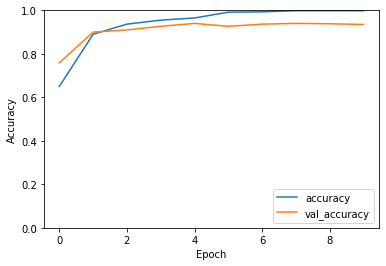

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
print(train_images.shape)
print(test_images.shape)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(186, 250, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))